# Extract short-term model outputs to compare with denudation rates measured from in-situ 10Be concentration in river sands

In [1]:
import h5py
import badlands_companion.cosmoAnalyse as Cosmo
from badlands import cosmoProd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dt       = 100
numsteps = 50
maxtime  = numsteps*dt
lat      = 40

# output folder where to extract values
folder     = '/mnt/d/SPM/Output/Alpsmodel_short/h5/'

# calls instance for analyzing 10Be outputs
extr       = Cosmo.cosmoAnalyse(folder,numsteps,dt)
cosmo      = cosmoProd.cosmoProd(lat)   
temps      = np.linspace(0,maxtime,numsteps)

# quartz proportion in Qz-bearing rocks (initial)
meanqprop = 0.5

In [3]:
# short function to read xyz data file, the 3rd column is the point ID where we want to extract the data
def read_datafile(filename):
    listdata=[]
    filen = datafolder+filename
    k     = open(filen,'r')
    lins = k.readlines()
    for element in lins:
        temp = element.split()
        listdata.append(int(temp[2]))
    k.close()
    return listdata

In [4]:
# Reads point IDs corresponding to the different sub-catchemnts of the Var,
# Vesubie and Tinee (see paper by Mariotti et al., 2019)

datafolder = '../Data/'

filen = datafolder+'Var_16_3.txt'
listvar = read_datafile(filen)

filen = datafolder+'Tinee_16_1.txt'
listtin1 = read_datafile(filen)


filen = datafolder+'Tinee_16_2.txt'
listtin2 = read_datafile(filen)

filen = datafolder+'Vesubie_16_1.txt'
listves1 = read_datafile(filen)

filen = datafolder+'Vesubie_16_2.txt'
listves2 = read_datafile(filen)

filen = datafolder+'Esteron_16_1.txt'
listest = read_datafile(filen)

filen = datafolder+'Coulomp_16_1.txt'
listcoul = read_datafile(filen)

In [5]:
# extract values for production and in-situ produced 10Be in the different sub-catchments
filename = folder+'tin.time50.hdf5'
prod    = extr.extract_production(filename,0,0,0,0,listvar)
a,b,c,d,mbe,e,f,g,h,i = extr.extract_erodedBe(lat,filename,0,0,0,0,listvar)
prod    = np.array(prod)
isP     = np.where(prod>0.)[0]
prodvar = np.mean(prod[isP])
Bevar   = mbe
prod    = extr.extract_production(filename,0,0,0,0,listtin1)
a,b,c,d,mbe,e,f,g,h,i     = extr.extract_erodedBe(lat,filename,0,0,0,0,listtin1)
prod    = np.array(prod)
isP     = np.where(prod>0.)[0]
prodtin1 = np.mean(prod[isP])
Betin1   = mbe
prod     = extr.extract_production(filename,0,0,0,0,listtin2)
a,b,c,d,mbe,e,f,g,h,i      = extr.extract_erodedBe(lat,filename,0,0,0,0,listtin2)
prod     = np.array(prod)
isP      = np.where(prod>0.)[0]
prodtin2 = np.mean(prod[isP])
Betin2   = mbe
prod     = extr.extract_production(filename,0,0,0,0,listves1)
a,b,c,d,mbe,e,f,g,h,i     = extr.extract_erodedBe(lat,filename,0,0,0,0,listves1)
prod     = np.array(prod)
isP      = np.where(prod>0.)[0]
prodves1 = np.mean(prod[isP])
Beves1   = mbe
prod     = extr.extract_production(filename,0,0,0,0,listves2)
a,b,c,d,mbe,e,f,g,h,i     = extr.extract_erodedBe(lat,filename,0,0,0,0,listves2)
prod     = np.array(prod)
isP      = np.where(prod>0.)[0]
prodves2 = np.mean(prod[isP])
Beves2   = mbe
prod     = extr.extract_production(filename,0,0,0,0,listest)
a,b,c,d,mbe,e,f,g,h,i      = extr.extract_erodedBe(lat,filename,0,0,0,0,listest)
prod     = np.array(prod)
isP      = np.where(prod>0.)[0]
prodest  = np.mean(prod[isP])
Beest    = mbe
prod     = extr.extract_production(filename,0,0,0,0,listcoul)
a,b,c,d,mbe,e,f,g,h,i    = extr.extract_erodedBe(lat,filename,0,0,0,0,listcoul)
prod     = np.array(prod)
isP      = np.where(prod>0.)[0]
prodcoul = np.mean(prod[isP])
Becoul   = mbe


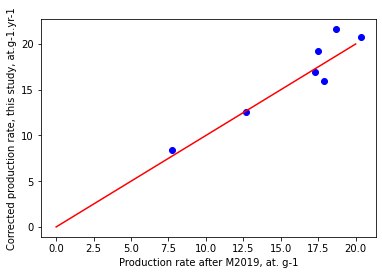

In [8]:
#compare production rates
Prod_Mariotti = [12.644,7.727,17.458,18.714,17.315,20.326,17.892]
Prod_us = [prodcoul,prodest,prodtin1,prodtin2,prodvar,prodves1,prodves2]
Prod_us = np.array(Prod_us)
plt.plot(Prod_Mariotti,Prod_us,'bo',[0, 20],[0,20],'r')
plt.xlabel('Production rate after M2019, at. g-1')
plt.ylabel('Corrected production rate, this study, at.g-1.yr-1')
#plt.savefig ('calibrationprod.jpg',dpi=300)
plt.show()

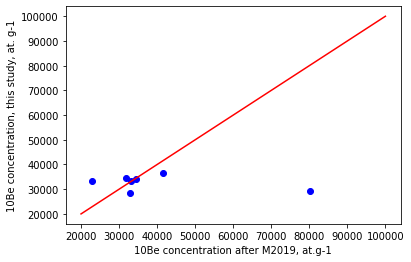

In [9]:
#compare 10Be concentration
Be_Mariotti = [8.03e4, 3.29e4, 4.16e4, 3.17e4, 3.44e4, 2.3e4, 3.32e4]
Be_us = [Becoul, Beest, Betin2, Betin1, Bevar, Beves1, Beves2]
plt.plot(Be_Mariotti,Be_us,'bo',[2e4, 1e5],[2e4, 1e5],'r')
plt.xlabel('10Be concentration after M2019, at.g-1')
plt.ylabel('10Be concentration, this study, at. g-1')
#plt.savefig ('Becalibration.jpg',dpi=300)
plt.show()

In [10]:
#compute denudation rate from in-situ produced 10Be
Be_ero_Coul = (prodcoul/Becoul - cosmo.Be_lambda)*cosmo.L_n / cosmo.rho * 10
Be_ero_Est  = (prodest/Beest - cosmo.Be_lambda)*cosmo.L_n / cosmo.rho * 10
Be_ero_Tin1 = (prodtin1/Betin1 - cosmo.Be_lambda)*cosmo.L_n / cosmo.rho * 10
Be_ero_Tin2 = (prodtin2/Betin2 - cosmo.Be_lambda)*cosmo.L_n / cosmo.rho * 10
Be_ero_Var  = (prodvar/Bevar - cosmo.Be_lambda)*cosmo.L_n / cosmo.rho * 10
Be_ero_Ves1 = (prodcoul/Beves1 - cosmo.Be_lambda)*cosmo.L_n / cosmo.rho * 10
Be_ero_Ves2 = (prodcoul/Beves2 - cosmo.Be_lambda)*cosmo.L_n / cosmo.rho * 10

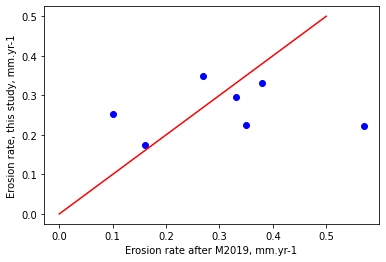

In [11]:
#compare apparent erosion rates
ero_Mariotti = [0.1, 0.16, 0.27, 0.38, 0.33, 0.57, 0.35]
ero_us = [Be_ero_Coul, Be_ero_Est, Be_ero_Tin2, Be_ero_Tin1, Be_ero_Var, Be_ero_Ves1, Be_ero_Ves2]
ero_us = np.array(ero_us)
plt.plot(ero_Mariotti,ero_us,'bo',[0, 0.5],[0., 0.5],'r')
plt.xlabel('Erosion rate after M2019, mm.yr-1')
plt.ylabel('Erosion rate, this study, mm.yr-1')
#plt.savefig ('erosioncalibration.jpg',dpi=300)
plt.show()